In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3018d7c1609c4ac6dd3b6cd9a9f5d0b4


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=3018d7c1609c4ac6dd3b6cd9a9f5d0b4&q=Boston


In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
     # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
     # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | shache
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | bolshevik
Processing Record 6 of Set 1 | westerland
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | aykhal
Processing Record 9 of Set 1 | egvekinot
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | pisco
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | maniitsoq
Processing Record 14 of Set 1 | novo aripuana
Processing Record 15 of Set 1 | kodiak
Processing Record 16 of Set 1 | sao filipe
Processing Record 17 of Set 1 | cantagallo
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | touros
Processing Record 20 of Set 1 | carutapera
Processing Record 21 of Set 1 | barrow
Processing Record 22 of Set 1 | katherine
Processing Record 23 

Processing Record 39 of Set 4 | chapais
Processing Record 40 of Set 4 | oranjemund
Processing Record 41 of Set 4 | disna
Processing Record 42 of Set 4 | korcula
Processing Record 43 of Set 4 | hofn
Processing Record 44 of Set 4 | saldanha
Processing Record 45 of Set 4 | oakville
Processing Record 46 of Set 4 | norsup
Processing Record 47 of Set 4 | ilulissat
Processing Record 48 of Set 4 | zakamensk
Processing Record 49 of Set 4 | sobolevo
Processing Record 50 of Set 4 | villarrica
Processing Record 1 of Set 5 | coquimbo
Processing Record 2 of Set 5 | sorong
Processing Record 3 of Set 5 | wronki
Processing Record 4 of Set 5 | yuzhou
Processing Record 5 of Set 5 | pionerskiy
Processing Record 6 of Set 5 | wanning
Processing Record 7 of Set 5 | kromeriz
Processing Record 8 of Set 5 | remontnoye
Processing Record 9 of Set 5 | saleaula
City not found. Skipping...
Processing Record 10 of Set 5 | arraial do cabo
Processing Record 11 of Set 5 | hithadhoo
Processing Record 12 of Set 5 | erzin


Processing Record 33 of Set 8 | bonthe
Processing Record 34 of Set 8 | kavieng
Processing Record 35 of Set 8 | ulaangom
Processing Record 36 of Set 8 | saint stephen
Processing Record 37 of Set 8 | jaque
Processing Record 38 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 39 of Set 8 | snezhnogorsk
Processing Record 40 of Set 8 | kyra
Processing Record 41 of Set 8 | adre
Processing Record 42 of Set 8 | lucca
Processing Record 43 of Set 8 | enshi
Processing Record 44 of Set 8 | zanesville
Processing Record 45 of Set 8 | mezhdurechensk
Processing Record 46 of Set 8 | kangaatsiaq
Processing Record 47 of Set 8 | yangjiang
Processing Record 48 of Set 8 | inhambane
Processing Record 49 of Set 8 | garowe
Processing Record 50 of Set 8 | ishikari
Processing Record 1 of Set 9 | lavrentiya
Processing Record 2 of Set 9 | craig
Processing Record 3 of Set 9 | pagman
City not found. Skipping...
Processing Record 4 of Set 9 | turukhansk
Processing Record 5 of Set 9 | normandin
Pr

Processing Record 18 of Set 12 | cristalina
Processing Record 19 of Set 12 | anzoategui
Processing Record 20 of Set 12 | ha tinh
Processing Record 21 of Set 12 | vega de alatorre
Processing Record 22 of Set 12 | geraldton
Processing Record 23 of Set 12 | khani
Processing Record 24 of Set 12 | sinazongwe
Processing Record 25 of Set 12 | letterkenny
Processing Record 26 of Set 12 | kutum
Processing Record 27 of Set 12 | tornio
Processing Record 28 of Set 12 | nguiu
City not found. Skipping...
Processing Record 29 of Set 12 | sioux lookout
Processing Record 30 of Set 12 | bourail
Processing Record 31 of Set 12 | tromso
Processing Record 32 of Set 12 | camana
Processing Record 33 of Set 12 | bonavista
Processing Record 34 of Set 12 | igrim
Processing Record 35 of Set 12 | lhuntshi
City not found. Skipping...
Processing Record 36 of Set 12 | polyarnyy
Processing Record 37 of Set 12 | oktyabrskiy
Processing Record 38 of Set 12 | qui nhon
Processing Record 39 of Set 12 | rabo de peixe
Process

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Butaritari,3.07,172.79,83.84,73,99,8.41,KI,2020-05-09 07:15:03
1,Shache,38.42,77.24,76.77,27,84,6.96,CN,2020-05-09 07:15:03
2,Albany,42.60,-73.97,34.00,60,99,1.01,US,2020-05-09 07:15:03
3,Puerto Ayora,-0.74,-90.35,75.99,94,83,1.99,EC,2020-05-09 07:14:18
4,Bolshevik,54.01,27.57,57.20,44,54,8.95,BY,2020-05-09 07:15:03
5,Westerland,54.91,8.30,53.60,81,0,6.93,DE,2020-05-09 07:15:04
6,Aykhal,66.00,111.50,35.60,37,100,4.47,RU,2020-05-09 07:15:04
7,Egvekinot,66.32,-179.17,34.00,88,67,11.25,RU,2020-05-09 07:15:04
8,Hilo,19.73,-155.09,75.20,73,20,3.36,US,2020-05-09 07:15:04
9,Pisco,-13.70,-76.22,64.40,88,100,8.05,PE,2020-05-09 07:15:04


In [12]:
city_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [13]:
city_data_df = city_data_df[city_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,2020-05-09 07:15:03,3.07,172.79,83.84,73,99,8.41
1,Shache,CN,2020-05-09 07:15:03,38.42,77.24,76.77,27,84,6.96
2,Albany,US,2020-05-09 07:15:03,42.60,-73.97,34.00,60,99,1.01
3,Puerto Ayora,EC,2020-05-09 07:14:18,-0.74,-90.35,75.99,94,83,1.99
4,Bolshevik,BY,2020-05-09 07:15:03,54.01,27.57,57.20,44,54,8.95
5,Westerland,DE,2020-05-09 07:15:04,54.91,8.30,53.60,81,0,6.93
6,Aykhal,RU,2020-05-09 07:15:04,66.00,111.50,35.60,37,100,4.47
7,Egvekinot,RU,2020-05-09 07:15:04,66.32,-179.17,34.00,88,67,11.25
8,Hilo,US,2020-05-09 07:15:04,19.73,-155.09,75.20,73,20,3.36
9,Pisco,PE,2020-05-09 07:15:04,-13.70,-76.22,64.40,88,100,8.05


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'05/09/20'

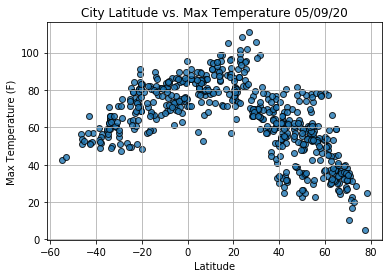

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

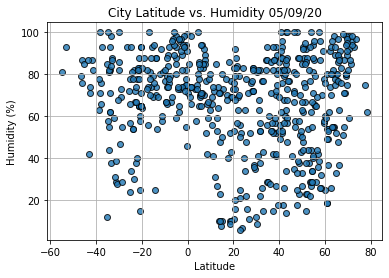

In [21]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

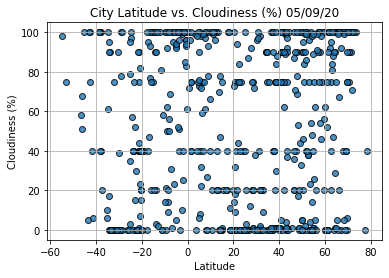

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

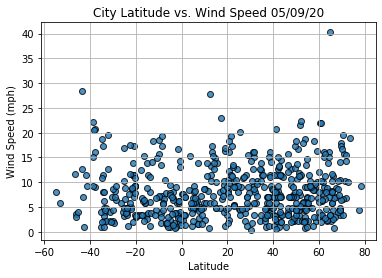

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()